# Exploratory Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# movies_raw is unfiltered for genre
# USE movies_raw dataframe when you want to analyze budgets/gross of any genre other than action/adventure
movies_raw = pd.read_csv('/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/Main Database/all_genres_vs_budgets.csv')
movies_raw.head()

# producers SOLELY contains ACTION/ADVENTURE PRODUCERS
producers = pd.read_csv('/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/notebooks/producers.csv')


#MAIN DATABASE = movies_primary
#this is really only useful for producer analysis
movies_primary = movies_raw.merge(producers,
                          left_on='movie',
                          right_on = 'primary_title',
                          how ='inner')

movies_primary = movies_primary[['movie', 'production_budget', 'worldwide_gross', 'release_month', 'release_year_x', 'genre_ids', 'primary_name', 'movie_id']]
movies_primary = movies_primary.rename(columns = {'release_year_x': 'release_year', 'primary_name': 'producer'})

movies_primary.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/Main Database/all_genres_vs_budgets.csv'

# BEYZA TO INSERT POPULARITY ANLYSIS CODE BELOW

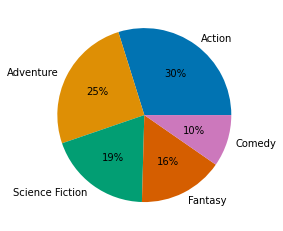

In [3]:
data = [34, 29, 22, 18, 11]
keys = ['Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Comedy']
palette_color = sb.color_palette('colorblind')
plt.pie(data, labels=keys, colors=palette_color,autopct='%.0f%%')
plt.show()

In [4]:
tmdb=pd.read_csv('C:/Users/Beyza/documents/flatiron/phase 1/DS-NATL-010923/p1_project/Microsoft-Pitch/zippedData/tmdb.movies.csv.gz', skipinitialspace=True)

In [7]:
tmdb.sort_values(by='release_date', inplace=True)
del tmdb['Unnamed: 0']
del tmdb['original_language']
del tmdb['vote_count']
del tmdb['original_title']
del tmdb['vote_average']
del tmdb['id']

In [8]:
tmdb=tmdb.loc[(tmdb['release_date'] >= '2016-01-01')
                     & (tmdb['release_date'] < '2019-12-30')]
tmdb.sort_values(by='popularity',ascending=False,inplace=True)
tmdb.head(10)

,genre_ids,popularity,release_date,title
23811,"[12, 28, 14]",80.77300,2018-04-27,Avengers: Infinity War
23812,"[28, 12, 16, 878, 35]",60.53400,2018-12-14,Spider-Man: Into the Spider-Verse
23813,"[878, 28, 53]",48.57100,2017-10-06,Blade Runner 2049
20617,"[878, 28, 53]",48.57100,2017-10-06,Blade Runner 2049
23814,[12],48.50800,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald
23815,"[10751, 16, 35, 14, 12]",48.05700,2018-11-21,Ralph Breaks the Internet
20618,"[28, 12, 878, 18]",46.77500,2017-07-07,Spider-Man: Homecoming
20619,"[53, 28, 80]",45.25300,2017-02-10,John Wick: Chapter 2
20620,"[28, 18, 878]",45.00000,2017-03-03,Logan
23816,"[28, 12, 878, 35]",44.72900,2018-07-06,Ant-Man and the Wasp


In [9]:
tmdb=tmdb.head(-8937)

In [10]:
tmdb = tmdb[['title', 'release_date', 'popularity']]

In [12]:
tmdb.columns = tmdb.columns.str.title() 
tmdb.rename(columns={"Release_Date" : "Release Date"}, inplace=True)
tmdb.drop_duplicates(subset=['Title'], keep='last')
tmdb.head(10)

,Title,Release Date,Popularity
23811,Avengers: Infinity War,2018-04-27,80.77300
23812,Spider-Man: Into the Spider-Verse,2018-12-14,60.53400
23813,Blade Runner 2049,2017-10-06,48.57100
20617,Blade Runner 2049,2017-10-06,48.57100
23814,Fantastic Beasts: The Crimes of Grindelwald,2018-11-16,48.50800
23815,Ralph Breaks the Internet,2018-11-21,48.05700
20618,Spider-Man: Homecoming,2017-07-07,46.77500
20619,John Wick: Chapter 2,2017-02-10,45.25300
20620,Logan,2017-03-03,45.00000
23816,Ant-Man and the Wasp,2018-07-06,44.72900


# HIGHEST GROSSING MOVIES


In [29]:
movies_gross = movies_raw.sort_values(by=['worldwide_gross'], ascending= False)
movies_gross = movies_gross.head(10)
movies_gross = movies_gross[['movie', 'worldwide_gross']]
movies_gross

,movie,worldwide_gross
1,Avengers: Infinity War,2048134200
9,Black Panther,1348258224
0,Star Wars: The Last Jedi,1316721747
30,Jurassic World: Fallen Kingdom,1305772799
34,Beauty and the Beast,1259199706
10,Incredibles 2,1242520711
6,The Fate of the Furious,1234846267
35,Aquaman,1146894640
4,Captain America: Civil War,1140069413
11,Rogue One: A Star Wars Story,1049102856


# JAKE'S HORROR MOVIE PROFIT CODE AND RUSSEL'S KID'S MOVIE PROFIT CODE??? 

## JUST SHOWING THAT WE BRIEFLY EXPLORED OTHER OPTIONS?

In [1]:
#Jake's Notebook

##### Import City ######

import pandas as pd
import sqlite3
import numpy as np
import datetime
import matplotlib.pyplot as plot
import seaborn as sns

##### Cleaning Up This Disgusting Data %%%%%%
df = pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/zippedData/tn.movie_budgets.csv.gz')
df.drop(df.domestic_gross.name, axis=1, inplace=True)
df.drop(df.id.name, axis=1, inplace=True)
df['worldwide_gross'] = df['worldwide_gross'].astype(str)
df['production_budget'] = df['production_budget'].astype(str)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df.worldwide_gross = pd.to_numeric(df.worldwide_gross, errors='coerce')
df.production_budget = pd.to_numeric(df.production_budget, errors='coerce')
df = df.rename(columns={'production_budget': 'Budget', 'worldwide_gross': 'Total Gross', 'movie': 'Title', 'release_date': 'Year'})
df['Year'] = pd.to_datetime(df['Year'])
df['Released'] = df['Year'].dt.year
df.drop(df.Year.name, axis=1, inplace=True)
df['Profit'] = df['Total Gross']-df['Budget']
df['Pure Profit'] = df['Profit']/df['Total Gross']
df['Pure Profit'] = df['Pure Profit']*100
df.drop(df.Profit.name, axis=1, inplace=True)

##### Printing the Top 10 most profitable movies #####
df = df.reset_index(drop=True)
df = df.loc[df["Released"] >=2017 ]
df = df.loc[df["Pure Profit"] >
        154]
df.sort_values(['Pure Profit'], ascending=[False])
df.sort_values(['Pure Profit'], ascending=[0], inplace=True)
df

,Title,Budget,Total Gross,Released,Pure Profit


# CLOSER LOOK AT ACTION/ADVENTURE

https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

## Sort for Genre ID

Action          28

Adventure       12

Below I'm triple checking that highest grossing movies are mostly action/adventure based on prior ip

In [30]:
movies_raw.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


In [31]:
movies_raw.describe()

,production_budget,worldwide_gross,release_month,release_year_x
count,441.00000,441.00000,441.00000,441.00000
mean,49398539.68254,169579872.61678,6.64399,2016.92744
std,59081618.20189,274077468.01085,3.53974,0.85504
min,30000.00000,0.00000,1.00000,2016.00000
25%,10000000.00000,12874922.00000,3.00000,2016.00000
50%,27000000.00000,59596747.00000,7.00000,2017.00000
75%,60000000.00000,190453132.00000,10.00000,2018.00000
max,317000000.00000,2048134200.00000,12.00000,2019.00000


In [33]:
#scraping out action movies that did not have worldwide release
action = movies_raw[(movies_raw['worldwide_gross'] > 0)]
action = action[(action['genre_ids'].str.contains("12")) | (action['genre_ids'].str.contains("28"))]

In [40]:
#Not for kids and family
action = action[(~action["genre_ids"].str.contains('10751'))]
action = action[(~action["genre_ids"].str.contains('16'))]
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


In [43]:
action['profit'] = action['worldwide_gross'] - action['production_budget']
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,profit
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",999721747
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]",1748134200
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]",355945209
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",118151347
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]",890069413


# TOP GROSSING ACTION MOVIES

In [44]:
action_highest_gross = action[(action['worldwide_gross'] >= 388660385)]
ahgsort = action_highest_gross.sort_values(by='worldwide_gross', ascending = False)
ahgsort1 = ahgsort.sort_values(by=['worldwide_gross'], ascending= False)
ahgsort1.head(10)

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,profit
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]",1748134200
9,Black Panther,200000000,1348258224,2,2018,"[28, 12, 14, 878]",1148258224
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",999721747
30,Jurassic World: Fallen Kingdom,170000000,1305772799,6,2018,"[28, 12, 878]",1135772799
6,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",984846267
35,Aquaman,160000000,1146894640,12,2018,"[28, 12, 14]",986894640
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]",890069413
11,Rogue One: A Star Wars Story,200000000,1049102856,12,2016,"[28, 12, 878]",849102856
77,Jumanji: Welcome to the Jungle,90000000,964496193,12,2017,"[28, 12, 35, 14]",874496193
25,Spider-Man: Homecoming,175000000,880166350,7,2017,"[28, 12, 878, 18]",705166350


# INSERT BAR CHART RE TOP 10 ACTION GROSS

# MOST PROFITABLE ACTION MOVIES

In [45]:
ahgsort1 = ahgsort.sort_values(by=['profit'], ascending=False)
ahgsort1.head(10)

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,profit
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]",1748134200
9,Black Panther,200000000,1348258224,2,2018,"[28, 12, 14, 878]",1148258224
30,Jurassic World: Fallen Kingdom,170000000,1305772799,6,2018,"[28, 12, 878]",1135772799
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",999721747
35,Aquaman,160000000,1146894640,12,2018,"[28, 12, 14]",986894640
6,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",984846267
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]",890069413
77,Jumanji: Welcome to the Jungle,90000000,964496193,12,2017,"[28, 12, 35, 14]",874496193
11,Rogue One: A Star Wars Story,200000000,1049102856,12,2016,"[28, 12, 878]",849102856
117,Deadpool,58000000,801025593,2,2016,"[28, 12, 35]",743025593


Text(0, 0.5, 'Gross')

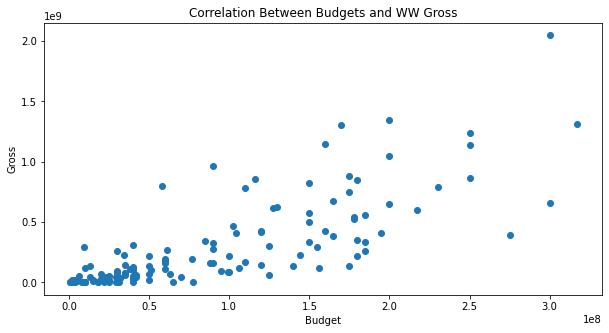

In [46]:
x = action['production_budget']
y = action['worldwide_gross']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and WW Gross')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross')

# ACTION/ADVENTURE TIME OF YEAR RELEASE - DOES IT MATTER? 

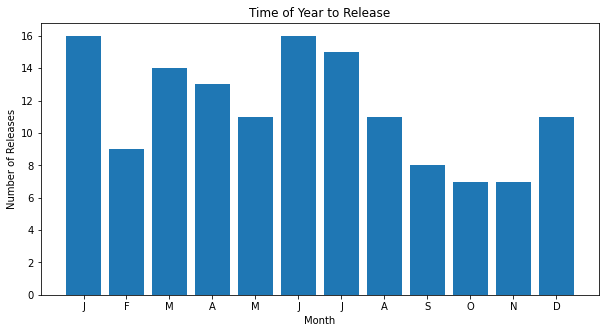

In [47]:
x = action['release_month'].value_counts().sort_index().index
y = action['release_month'].value_counts().sort_index().values
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Time of Year to Release')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Releases')
ax.set_xticks(range(1,13))
ax.set_xticklabels(list('JFMAMJJASOND'));